In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [2]:
tf.executing_eagerly()

True

In [3]:
path_to_file = "/home/rohit/datasets/hin-eng/hin.txt"
print(os.listdir("."))

['eng_hi_w_attn.ipynb', 'NMT_Mtokenizer.pkl', 'marathi_eng.ipynb', 'eng_hi_wo_attention.ipynb', 'NMT_Etokenizer.pkl', '.ipynb_checkpoints', 'models', 'language_data.csv', 'NMT_data.pkl']


In [4]:


# Converts the unicode file to ascii
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())

  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^a-zA-Z\u0900-\u097f?.!,¿]+", " ", w)
#\u0900-\u097f
  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

In [5]:


en_sentence = u"Help!"
sp_sentence = u"बचाओ!"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence))#.encode('utf-8'))



<start> help ! <end>
<start> बचाओ ! <end>


In [6]:


# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, SPANISH]
def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')
  print(lines[1])
 

  word_pairs = [[preprocess_sentence(w) for w in l.split('\t')[:2]]  for l in lines[:num_examples]]


  return zip(*word_pairs)



In [7]:
sp,en = create_dataset(path_to_file, None)
print(en[1])
print(sp[1])
print(sp[5:])

Duck!	झुको!	CC-BY 2.0 (France) Attribution: tatoeba.org #280158 (CM) & #6179041 (fastrizwaan)
<start> झको ! <end>
<start> duck ! <end>
('<start> jump . <end>', '<start> jump . <end>', '<start> hello ! <end>', '<start> hello ! <end>', '<start> cheers ! <end>', '<start> cheers ! <end>', '<start> got it ? <end>', '<start> i m ok . <end>', '<start> thanks ! <end>', '<start> we won . <end>', '<start> awesome ! <end>', '<start> come in . <end>', '<start> get out ! <end>', '<start> go away ! <end>', '<start> goodbye ! <end>', '<start> perfect ! <end>', '<start> perfect ! <end>', '<start> we lost . <end>', '<start> welcome . <end>', '<start> welcome . <end>', '<start> have fun . <end>', '<start> have fun . <end>', '<start> have fun . <end>', '<start> i forgot . <end>', '<start> i forgot . <end>', '<start> i ll pay . <end>', '<start> i m fine . <end>', '<start> i m full . <end>', '<start> let s go ! <end>', '<start> answer me . <end>', '<start> birds fly . <end>', '<start> excuse me . <end>', '

In [8]:
sp

('<start> wow ! <end>',
 '<start> duck ! <end>',
 '<start> duck ! <end>',
 '<start> help ! <end>',
 '<start> jump . <end>',
 '<start> jump . <end>',
 '<start> jump . <end>',
 '<start> hello ! <end>',
 '<start> hello ! <end>',
 '<start> cheers ! <end>',
 '<start> cheers ! <end>',
 '<start> got it ? <end>',
 '<start> i m ok . <end>',
 '<start> thanks ! <end>',
 '<start> we won . <end>',
 '<start> awesome ! <end>',
 '<start> come in . <end>',
 '<start> get out ! <end>',
 '<start> go away ! <end>',
 '<start> goodbye ! <end>',
 '<start> perfect ! <end>',
 '<start> perfect ! <end>',
 '<start> we lost . <end>',
 '<start> welcome . <end>',
 '<start> welcome . <end>',
 '<start> have fun . <end>',
 '<start> have fun . <end>',
 '<start> have fun . <end>',
 '<start> i forgot . <end>',
 '<start> i forgot . <end>',
 '<start> i ll pay . <end>',
 '<start> i m fine . <end>',
 '<start> i m full . <end>',
 '<start> let s go ! <end>',
 '<start> answer me . <end>',
 '<start> birds fly . <end>',
 '<start> e

In [9]:
en

('<start> वाह ! <end>',
 '<start> झको ! <end>',
 '<start> बतख ! <end>',
 '<start> बचाओ ! <end>',
 '<start> उछलो . <end>',
 '<start> कदो . <end>',
 '<start> छलाग . <end>',
 '<start> नमसत। <end>',
 '<start> नमसकार। <end>',
 '<start> वाह वाह ! <end>',
 '<start> चियरस ! <end>',
 '<start> समझ कि नही ? <end>',
 '<start> म ठीक ह। <end>',
 '<start> धनयवाद ! <end>',
 '<start> हम जीत। <end>',
 '<start> बहत बढिया ! <end>',
 '<start> अदर आ जाओ। <end>',
 '<start> बाहर निकल जाओ ! <end>',
 '<start> चल जाओ ! <end>',
 '<start> खदा हाफिज। <end>',
 '<start> उततम ! <end>',
 '<start> सही ! <end>',
 '<start> हम हार गए। <end>',
 '<start> आपका सवागत ह। <end>',
 '<start> सवागतम। <end>',
 '<start> मज करना। <end>',
 '<start> मौज करना। <end>',
 '<start> मज करो। <end>',
 '<start> म भल गया। <end>',
 '<start> म भल गई। <end>',
 '<start> म पस दगा। <end>',
 '<start> म ठीक ह। <end>',
 '<start> मरा पट भर गया ह। <end>',
 '<start> चलो चल ! <end>',
 '<start> मझ जवाब दो। <end>',
 '<start> पछी उडत ह। <end>',
 '<start> माफ कीज

In [10]:
def tokenize(lang, split=None):
  if split== None:
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  else:
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
     filters='')

  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

  return tensor, lang_tokenizer

In [11]:
def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  inp_lang, targ_lang = create_dataset(path, num_examples)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang, split=" ")
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [12]:
# Try experimenting with the size of that dataset
num_examples = 300000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

Duck!	झुको!	CC-BY 2.0 (France) Attribution: tatoeba.org #280158 (CM) & #6179041 (fastrizwaan)


In [13]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

2332 2332 583 583


In [14]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [15]:


print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])



Input Language; index to word mapping
1 ----> <start>
11 ----> he
24 ----> was
401 ----> sick
137 ----> last
306 ----> week
3 ----> .
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
8 ----> वह
353 ----> पिछल
289 ----> हफत
406 ----> बीमार
22 ----> था।
2 ----> <end>


In [16]:


BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)



2022-09-03 02:34:47.826947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 02:34:48.606303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 02:34:48.607962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-03 02:34:48.653686: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [17]:


example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape



(TensorShape([64, 28]), TensorShape([64, 29]))

In [18]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences= True,
                                   return_state= True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [19]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

2022-09-03 02:35:23.270365: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


Encoder output shape: (batch size, sequence length, units) (64, 28, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [20]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [21]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 28, 1)


In [22]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [23]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 2771)


In [24]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [25]:


checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)



In [26]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [27]:
EPOCHS = 100

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

2022-09-03 02:39:03.119680: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1 Batch 0 Loss 2.1738
Epoch 1 Loss 1.7910
Time taken for 1 epoch 24.445435762405396 sec

Epoch 2 Batch 0 Loss 1.5662
Epoch 2 Loss 1.5264
Time taken for 1 epoch 5.078603267669678 sec

Epoch 3 Batch 0 Loss 1.4123
Epoch 3 Loss 1.4082
Time taken for 1 epoch 4.823960542678833 sec

Epoch 4 Batch 0 Loss 1.3216
Epoch 4 Loss 1.3229
Time taken for 1 epoch 4.9940431118011475 sec

Epoch 5 Batch 0 Loss 1.1610
Epoch 5 Loss 1.2495
Time taken for 1 epoch 4.819738388061523 sec

Epoch 6 Batch 0 Loss 1.1274
Epoch 6 Loss 1.1774
Time taken for 1 epoch 5.013254642486572 sec

Epoch 7 Batch 0 Loss 1.0587
Epoch 7 Loss 1.1085
Time taken for 1 epoch 4.84254264831543 sec

Epoch 8 Batch 0 Loss 1.1293
Epoch 8 Loss 1.0536
Time taken for 1 epoch 5.011828660964966 sec

Epoch 9 Batch 0 Loss 1.0130
Epoch 9 Loss 0.9960
Time taken for 1 epoch 4.839199781417847 sec

Epoch 10 Batch 0 Loss 0.9411
Epoch 10 Loss 0.9430
Time taken for 1 epoch 5.036519527435303 sec

Epoch 11 Batch 0 Loss 0.8929
Epoch 11 Loss 0.8864
Time ta

Epoch 87 Loss 0.0091
Time taken for 1 epoch 5.015009880065918 sec

Epoch 88 Batch 0 Loss 0.0029
Epoch 88 Loss 0.0091
Time taken for 1 epoch 5.266959190368652 sec

Epoch 89 Batch 0 Loss 0.0048
Epoch 89 Loss 0.0091
Time taken for 1 epoch 5.008516073226929 sec

Epoch 90 Batch 0 Loss 0.0033
Epoch 90 Loss 0.0091
Time taken for 1 epoch 5.206881999969482 sec

Epoch 91 Batch 0 Loss 0.0079
Epoch 91 Loss 0.0090
Time taken for 1 epoch 5.0191028118133545 sec

Epoch 92 Batch 0 Loss 0.0057
Epoch 92 Loss 0.0087
Time taken for 1 epoch 5.277312755584717 sec

Epoch 93 Batch 0 Loss 0.0051
Epoch 93 Loss 0.0088
Time taken for 1 epoch 5.039346933364868 sec

Epoch 94 Batch 0 Loss 0.0026
Epoch 94 Loss 0.0090
Time taken for 1 epoch 5.201793670654297 sec

Epoch 95 Batch 0 Loss 0.0069
Epoch 95 Loss 0.0089
Time taken for 1 epoch 5.064890384674072 sec

Epoch 96 Batch 0 Loss 0.0061
Epoch 96 Loss 0.0089
Time taken for 1 epoch 5.445667266845703 sec

Epoch 97 Batch 0 Loss 0.0059
Epoch 97 Loss 0.0095
Time taken for 1 e

In [28]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [29]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 10}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [30]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [31]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Input: <start> the war is going in our favor . <end>
Predicted translation: जग हमार हित म जा रहा ह। <end> 


/tmp/ipykernel_28692/666678622.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_28692/666678622.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packag

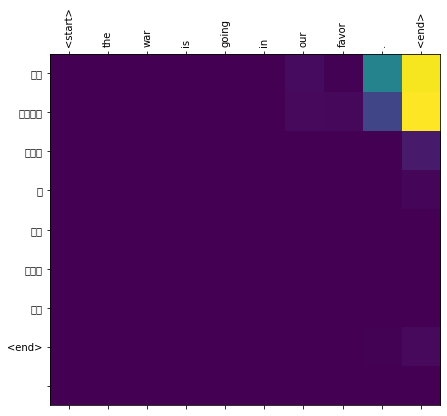

In [32]:
translate(u'the war is going in our favor.')

Input: <start> he made such a long speech that we all got bored . <end>
Predicted translation: उसन इतना लमबा भाषण दिया कि हम सब को बोर कर डाला। <end> 


/tmp/ipykernel_28692/666678622.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_28692/666678622.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packag

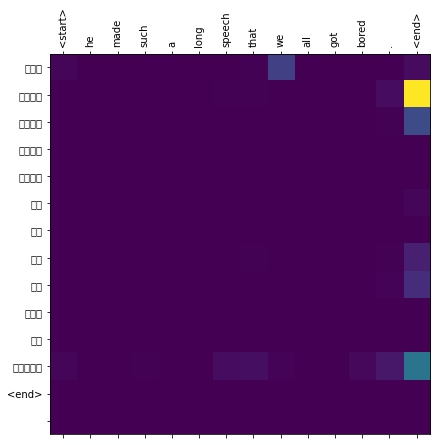

In [33]:
translate(u"he made such a long speech that we all got bored .")

Input: <start> we don t know where we are . <end>
Predicted translation: हम नही पता हम कहा ह। <end> 


/tmp/ipykernel_28692/666678622.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_28692/666678622.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 2368 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/rohit/anaconda3/envs/tf_new/lib/python3.8/site-packages

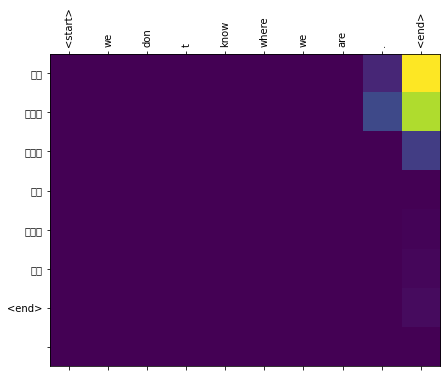

In [34]:
translate("we don't know where we are.")